In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats
from sklearn.metrics import mean_squared_error
import math
from sklearn.linear_model import LinearRegression

Data=pd.read_csv('/Users/juyoung/Desktop/빅데이터프로그래밍/프로젝트/data/depression.csv',encoding='utf-8')
Data=Data[Data['Code']=='v']
Data=Data.dropna(axis=0)
Data=Data.reset_index()
Data


,index,Entity,Code,Year,depression_percent,Real_house_price,Percentage_change_PIR,Safety,Working_age_popul,Elderly_popul,Working_hours,Unemploy_rate,Employ_rate,Gini_coff
0,0,Australia,v,2017,4.623881,102.2,8.3,63.0,65.5,15.7,1712.0,6.498750,74.275,0.325
1,1,Austria,v,2017,3.260970,117.9,5.3,81.0,66.8,18.8,1501.0,5.333500,73.575,0.280
2,2,Belgium,v,2017,4.109186,106.4,3.6,70.0,64.2,18.8,1583.0,5.550000,65.300,0.258
3,3,Canada,v,2017,3.988792,123.4,12.1,82.0,66.7,17.2,1670.0,9.600000,74.150,0.303
4,4,Chile,v,2017,4.057723,111.3,6.7,48.0,68.7,11.5,1914.0,10.765000,64.125,0.460
5,5,Czech Republic,v,2017,2.675387,131.0,11.7,72.0,64.8,19.4,1788.0,2.558250,75.150,0.249
6,6,Denmark,v,2017,3.291885,114.3,4.5,84.0,64.0,19.5,1380.0,5.641750,75.050,0.264
7,7,Estonia,v,2017,3.848854,112.4,5.5,69.0,64.0,19.7,1711.0,6.766500,75.275,0.305
8,8,Finland,v,2017,4.792736,101.1,1.6,85.0,62.3,21.6,1540.0,7.783250,72.975,0.269
9,9,France,v,2017,4.253807,106.8,3.0,71.0,62.1,19.8,1505.0,8.050000,65.550,0.301


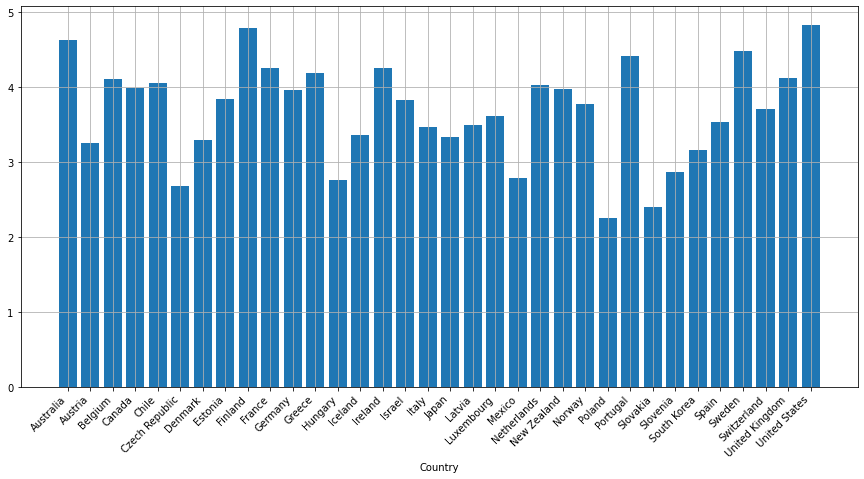

In [9]:
plt.figure(figsize=(15,7))
plt.bar(Data['Entity'],Data['depression_percent'])
plt.grid(True)
plt.xlabel('Country')
plt.xticks(rotation=45, ha='right')
plt.show()

In [10]:
def Make_data(dataframe, data):
    dataframe=dataframe.sort_values(by=data)
    dataframe=dataframe.reset_index()
    return dataframe

def Make_plt(dataframe,data,c):
    plt.plot(dataframe[data],dataframe['Happiness_score'],'o',color=c,label=dataframe)

def Make_linear(dataframe,data):
    linear=LinearRegression()
    linear.fit(dataframe[data].values.reshape(-1,1),dataframe['Happiness_score'])
    pred=linear.predict(dataframe[data].values.reshape(-1,1))
    plt.plot(dataframe[data],linear.predict(dataframe[data].values.reshape(-1,1)),color='red')

    print('Score : ', linear.score(dataframe[data].values.reshape(-1,1),dataframe['Happiness_score']))
    print('RMSE : ', mean_squared_error(pred, dataframe['Happiness_score'])**0.5)
    print('MSE : ', mean_squared_error(pred, dataframe['Happiness_score']),'\n')
    
    print("기울기 : ",linear.coef_)
    print("절편 : ",linear.intercept_,"\n\n")
    
def Make_name(dataframe,data):
    for i, txt in enumerate(dataframe['Country']):
        plt.annotate(txt,(dataframe[data][i],dataframe['Happiness_score'][i]),size=15)
        
def Pearson_corr(dataframe,data):
    body=pd.DataFrame({'Happiness_score':dataframe['Happiness_score'],data:dataframe[data]})

    pearson_corr=body.corr(method='pearson')
    print('pearson_corr : {}\n\n'.format(pearson_corr))